In [28]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from scipy.stats import mannwhitneyu

In [29]:
# Load df
with open("../data/processed/control_df_processed.pkl", "rb") as file:
    control_df = pickle.load(file)
    
control_df.head(5)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,CPC,CPA,AOV,CTR,Conversion Rate
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.324971,3.689320,3.689320,8.483471,8.808438
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,0.216646,3.438356,3.438356,6.700264,6.300863
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,0.360018,6.298387,6.298387,4.941121,5.716042
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,0.632953,5.705882,5.705882,4.205659,11.092985
5,Control Campaign,2019-08-06,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0,0.765392,4.035340,4.035340,3.692838,18.967229


In [30]:
# Load df
with open("../data/processed/test_df_processed.pkl", "rb") as file:
    test_df = pickle.load(file)
    
test_df.head(5)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,CPC,CPA,AOV,CTR,Conversion Rate
0,Test Campaign,2019-08-01,3008,39550,35820,3038,1946,1069,894,255,0.990125,11.796078,11.796078,7.681416,8.393680
1,Test Campaign,2019-08-02,2542,100719,91236,4657,2359,1548,879,677,0.545845,3.754801,3.754801,4.623755,14.537256
2,Test Campaign,2019-08-03,2365,70263,45198,7885,2572,2367,1268,578,0.299937,4.091696,4.091696,11.222123,7.330374
3,Test Campaign,2019-08-04,2710,78451,25937,4216,2216,1437,566,340,0.642789,7.970588,7.970588,5.374055,8.064516
4,Test Campaign,2019-08-05,2297,114295,95138,5863,2106,858,956,768,0.391779,2.990885,2.990885,5.129708,13.099096


In [31]:
control_df.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,CPC,CPA,AOV,CTR,Conversion Rate
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2304.068966,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103,0.494908,5.052339,5.052339,5.095871,11.477203
std,363.534822,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642,0.221015,2.117020,2.117020,2.050769,6.838270
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000,0.216646,2.253750,2.253750,1.857546,3.349427
25%,1962.000000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000,0.328455,3.438356,3.438356,3.618618,6.300863
50%,2319.000000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000,0.417122,4.621005,4.621005,4.720190,10.227453
75%,2544.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000,0.566585,6.298387,6.298387,6.700264,14.383856
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000,1.037626,9.806306,9.806306,8.830912,32.235397


In [32]:
test_df.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,CPC,CPA,AOV,CTR,Conversion Rate
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333,0.468718,5.899589,5.899589,10.242260,9.231182
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745,0.178566,2.800766,2.800766,6.770897,4.448987
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000,0.248799,2.428571,2.428571,2.982351,3.008850
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000,0.331836,3.725002,3.725002,5.313017,6.568272
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000,0.448842,5.062840,5.062840,8.035887,8.454291
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000,0.595935,7.718778,7.718778,12.849262,11.668361
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000,0.990125,12.702041,12.702041,33.821766,21.085051


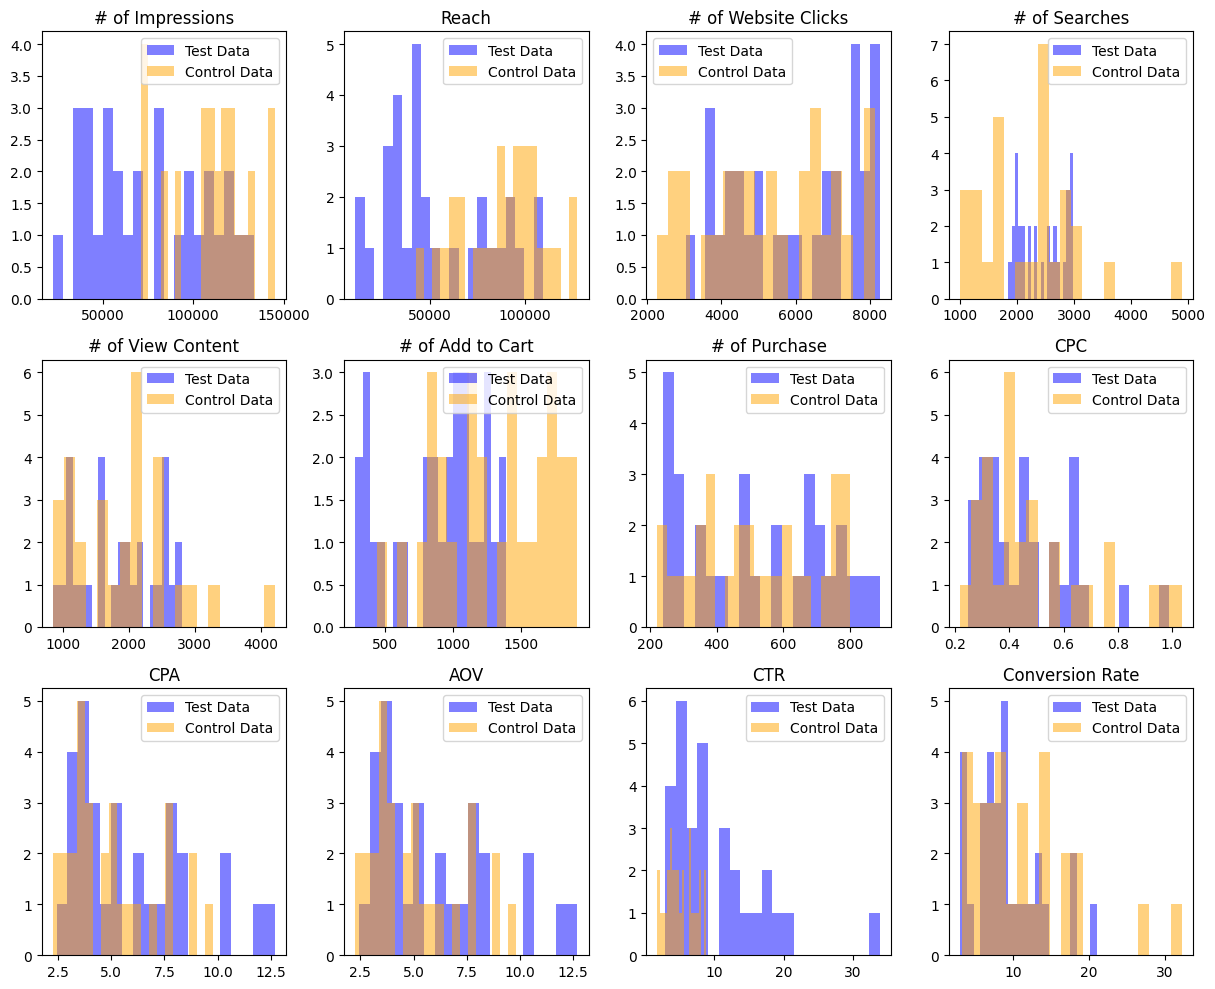

In [33]:
def plot_histograms(test_df, control_df):
    num_columns = min(len(test_df.columns) - 3, len(control_df.columns) - 3)
    num_rows = (num_columns + 3) // 4
    fig, axs = plt.subplots(nrows=num_rows, ncols=4, figsize=(12, 10))

    for i, (test_column, control_column) in enumerate(zip(test_df.columns[3:], control_df.columns[3:])):
        row = i // 4
        col = i % 4
        axs[row, col].hist(test_df[test_column], bins=20, alpha=0.5, label='Test Data', color='blue')
        axs[row, col].hist(control_df[control_column], bins=20, alpha=0.5, label='Control Data', color='orange')
        axs[row, col].set_title(f'{test_column}')
        axs[row, col].legend()

    # Remove empty subplots
    for i in range(num_columns, num_rows * 4):
        fig.delaxes(axs.flatten()[i])

    plt.tight_layout()
    plt.show()

plot_histograms(test_df, control_df)

1. **Number of Impressions:**
   - The test data displays a greater spread than the control, signifying increased variability in the number of impressions within the test campaign compared to the control campaign.

2. **Reach:**
   - The test data exhibits a rightward skew, indicating the presence of a few instances with significantly higher reach in the test campaign. In contrast, the control data adheres to a bell-shaped curve, suggesting a more normal distribution of reach.

3. **Number of Website Clicks:**
   - The test data is skewed left, signaling a scarcity of instances with high numbers of website clicks in the test campaign. Conversely, the control data portrays a wider spread, implying greater variability in the number of clicks.

4. **Number of Searches:**
   - The control data boasts a considerably larger spread, reflecting a broader range of values for the number of searches. In contrast, the test data exhibits a smaller spread, indicating fewer variations in search numbers.

5. **Number of View Content:**
   - The control data demonstrates a notably larger spread, suggesting a wider range of values for the number of users who viewed content and products on the website. Conversely, the test data presents a smaller spread, indicating fewer variations in views.

6. **Number of Add to Cart:**
   - The test data manifests a lower frequency overall than the control data, suggesting a diminished number of users adding products to the cart in the test campaign compared to the control campaign.

7. **Number of Purchases:**
   - The test data is heavily skewed right, revealing instances with significantly higher numbers of purchases in the test campaign. In contrast, the control data exhibits lower frequency overall.

8. **Cost Per Click (CPC):**
   - Both test and control data demonstrate a rightward skew, suggesting the presence of instances with higher CPC in both campaigns.

9. **Cost Per Acquisition (CPA):**
   - Both test and control data display a rightward skew, indicating a higher frequency of elevated CPA instances in both campaigns.

10. **Average Order Value (AOV):**
    - Both test and control data show a rightward skew, hinting at instances with higher average order values in both campaigns.

11. **Click-Through Rate (CTR):**
    - The test data showcases a much broader spread than the control and performs better overall for CTR. The right skew indicates the existence of instances with significantly higher CTR in the test campaign.

12. **Conversion Rate:**
    - Both test and control data exhibit a rightward skew, suggesting the presence of instances with higher conversion rates in both campaigns.

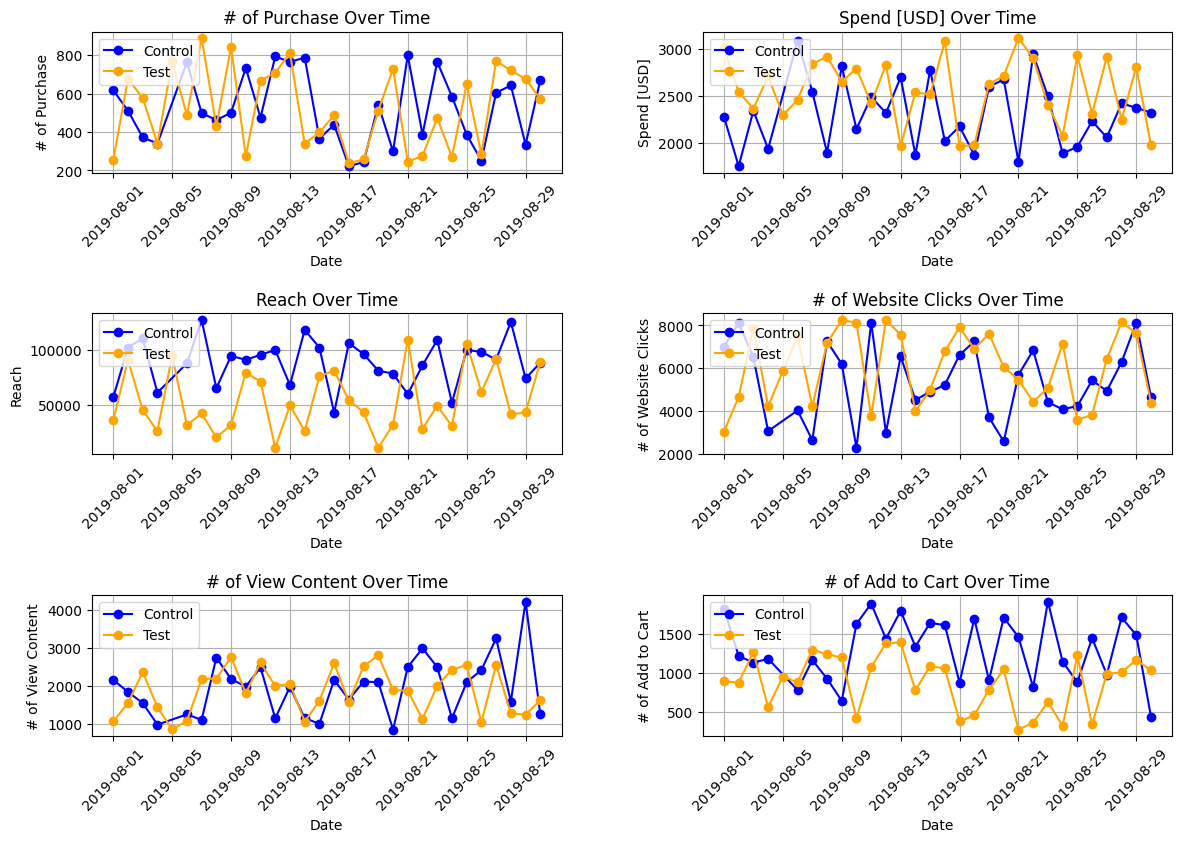

In [34]:
def plot_metrics_over_time(control_df, test_df):
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))

    # Metrics to plot
    metrics = ['# of Purchase', 'Spend [USD]', 'Reach', '# of Website Clicks', '# of View Content', '# of Add to Cart']

    for i, metric in enumerate(metrics):
        row = i // 2
        col = i % 2
        axs[row, col].plot(control_df['Date'], control_df[metric], label='Control', marker='o', linestyle='-', color='blue')
        axs[row, col].plot(test_df['Date'], test_df[metric], label='Test', marker='o', linestyle='-', color='orange')
        axs[row, col].set_title(f'{metric} Over Time')
        axs[row, col].set_xlabel('Date')
        axs[row, col].set_ylabel(metric)
        axs[row, col].legend(loc='upper left')
        axs[row, col].grid(True)

    plt.tight_layout()
    plt.subplots_adjust(hspace=1, wspace=0.3)
    for ax in axs.flat:
        ax.tick_params(axis='x', labelrotation=45)
    plt.show()

plot_metrics_over_time(control_df, test_df)

## Looking at different Key Performance Indicators (KPIs)
**Cost per Click (CPC):**
CPC calculates the cost for each click generated by the campaign

**Cost per Acquisition (CPA):**
CPA calculates the cost to generate a sale (ie. have a customer purchase an item)

**Customer Acquisition Cost (CAC):** CAC measures how much it costs to acquire a new customer through your ad campaign. Lower CAC is usually better.

**Average Order Value (AOV):** AOV represents the average amount customers spend in a single transaction. A/B testing can help optimize this value.

**CLick Through Rate (CTR):** CTR measures the percentage of users who clicked on the ad after seeing it.

**Conversion Rate:** measures the percentage of users who completed a specific action after clicking on the ad, such as making a purchase.
<br>


***Cost Efficiency:
Metrics like Cost per Click (CPC) and Cost per Acquisition (CPA) are crucial for
evaluating the cost-effectiveness of your campaign.
If you have budget constraints, these metrics may be highly significant.***

In [35]:
def print_average_metrics(df):
    required_columns = ['CPA', 'CPC', 'AOV', 'Conversion Rate', 'CTR']

    if set(required_columns).issubset(df.columns):
        average_values = df[required_columns].mean()
        print(f"Average Metrics for {df.name}:")
        for metric, value in average_values.items():
            if metric in ['Conversion Rate', 'CTR']:
                print(f"{metric}: {value:.2f}%")
            else:
                print(f"{metric}: ${value:.2f}")
        print("\n")
    else:
        print(f"{df.name} is missing one or more of the required columns: {', '.join(required_columns)}")

control_df.name = 'Control Data'
test_df.name = 'Test Data'

dataframes = [control_df, test_df] 

for df in dataframes:
    print_average_metrics(df)


Average Metrics for Control Data:
CPA: $5.05
CPC: $0.49
AOV: $5.05
Conversion Rate: 11.48%
CTR: 5.10%


Average Metrics for Test Data:
CPA: $5.90
CPC: $0.47
AOV: $5.90
Conversion Rate: 9.23%
CTR: 10.24%




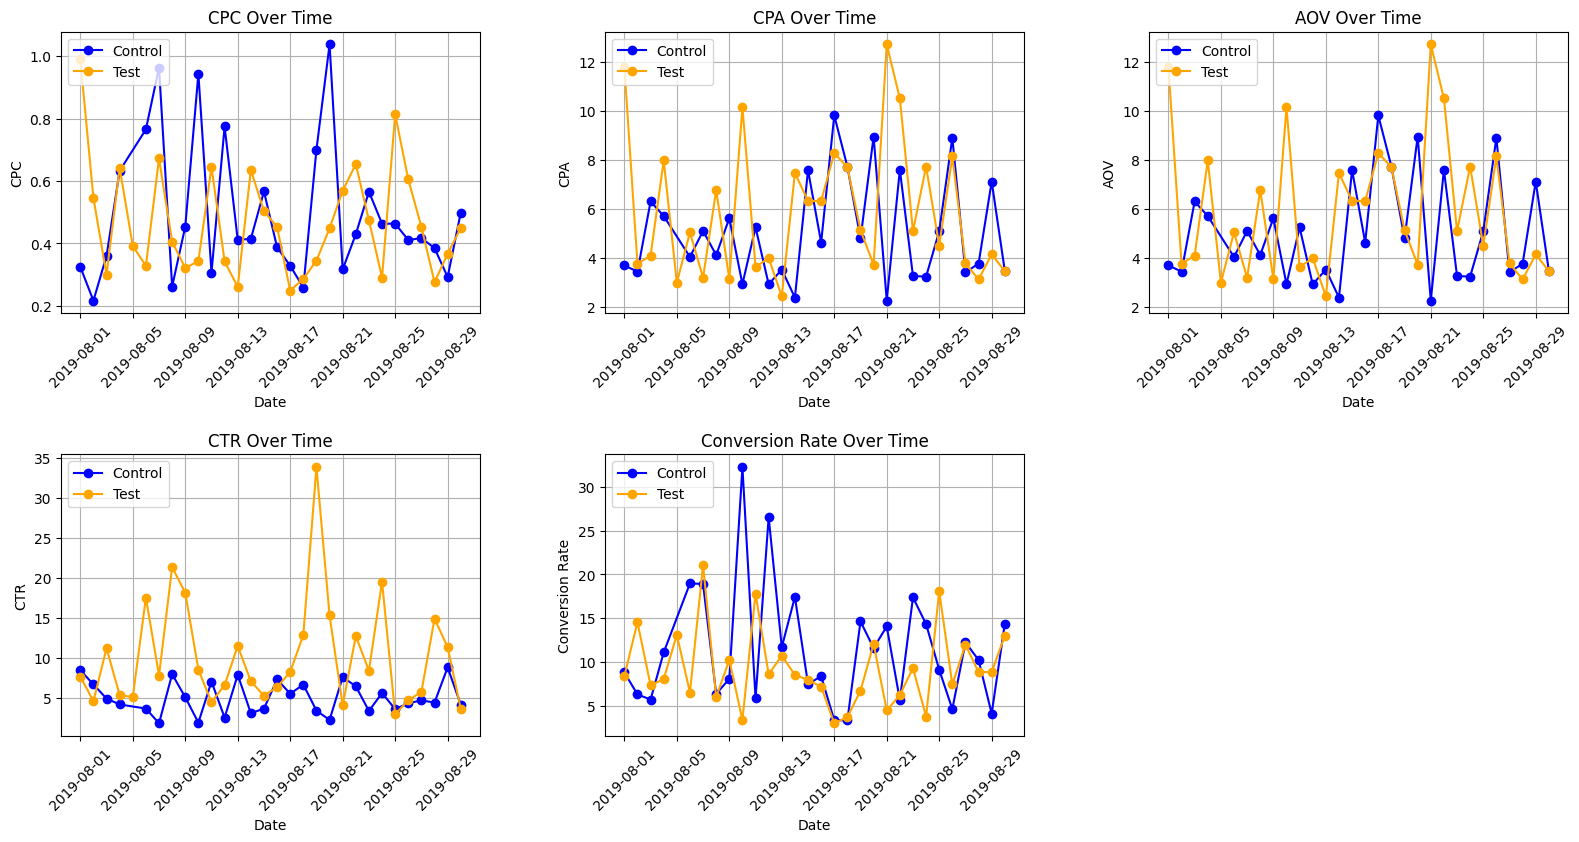

In [37]:
def plot_kpis_over_time(control_df, test_df):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

    # Metrics to plot
    metrics = ['CPC', 'CPA', 'AOV', 'CTR', 'Conversion Rate']

    for i, metric in enumerate(metrics):
        row = i // 3
        col = i % 3
        axs[row, col].plot(control_df['Date'], control_df[metric], label='Control', marker='o', linestyle='-', color='blue')
        axs[row, col].plot(test_df['Date'], test_df[metric], label='Test', marker='o', linestyle='-', color='orange')
        axs[row, col].set_title(f'{metric} Over Time')
        axs[row, col].set_xlabel('Date')
        axs[row, col].set_ylabel(metric)
        axs[row, col].legend(loc='upper left')
        axs[row, col].grid(True)

    # Create an empty subplot
    row = 1
    col = 2
    axs[row, col].axis('off')

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5, wspace=0.3)

    for ax in axs.flat:
        ax.tick_params(axis='x', labelrotation=45)

    plt.show()

plot_kpis_over_time(control_df, test_df)


1. **Cost Per Click (CPC):**
   - The control campaign exhibited an overall increase in CPC over time, maintaining a degree of consistency. In contrast, the test campaign showed a gradual decrease in CPC throughout the campaign. This suggests that, while the control maintained a relatively stable cost per click, the test campaign strategically managed to reduce its CPC over the course of the campaign.

2. **Cost Per Acquisition (CPA):**
   - Over the campaign period, the test campaign displayed a gradual decrease in CPA, with a few days having a high CPA, indicating an overall improvement in efficiency and cost-effectiveness. Conversely, the control campaign experienced an overall increase in CPA - implieng that the test campaign progressively optimized its cost per acquisition, potentially achieving better results compared to the control.

3. **Average Order Value (AOV):**
   - Both campaigns exhibited similar trends with peaks and lows over time. However, the test campaign consistently maintained higher values for AOV compared to the control - suggesting that, on average, the test campaign generated higher revenue per order, indicating potentially more valuable or larger transactions compared to the control campaign.

4. **Click-Through Rate (CTR):**
   - The test campaign outperformed the control for the majority of the campaign duration, with only a few exceptions where the control briefly caught up. This suggests that the test campaign consistently attracted a higher percentage of clicks in relation to the number of impressions, indicating more effective engagement with the audience.

5. **Conversion Rate:**
   - Both the test and control campaigns displayed an overall increase (positive trend) in conversion rate over the course of the campaign - sugegesting that both campaigns improved their effectiveness in converting interactions into desired outcomes. The simultaneous improvement in conversion rates for both campaigns suggests a shared effort to enhance user engagement and drive desired actions.
